In [29]:
import pandas as pd
import numpy as np
import h2o
from h2o.automl import H2OAutoML
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
# from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.estimators import H2OGradientBoostingEstimator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [102]:
# Read in the dataset
df = pd.read_csv('la_lluna.csv', parse_dates=['date'])

# Drop categorical column for weekday
df.drop(["weekday_str"], axis=1, inplace=True)

# Drop dates older than 6 of march 2023
df = df[df["date"] < "2023-03-07"]

# fill windgust column nan with 0 for 6 nan in 2020
df["windgust"].fillna(0, inplace=True)

# Sort the dataset by date
df.sort_values('date', inplace=True)

# Set date as the index
df.set_index('date', inplace=True)

In [43]:
# Read in the dataset
df = pd.read_csv('la_lluna.csv', parse_dates=['date'])

# Drop categorical column for weekday
df.drop(["weekday_str"], axis=1, inplace=True)

# Drop dates older than 6 of march 2023
df = df[df["date"] < "2023-03-07"]

# fill windgust column nan with 0 for 6 nan in 2020
df["windgust"].fillna(0, inplace=True)

# Sort the dataset by date
df.sort_values('date', inplace=True)

# Set date as the index
df.set_index('date', inplace=True)

# Define the features and target variable
X = df.drop('daily_revenue', axis=1).values
y = df['daily_revenue'].values

# Split the dataset into train and test sets
train_size = int(len(df) * 0.8)
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
train_y = scaler.fit_transform(train_y.reshape(-1, 1))
test_y = scaler.transform(test_y.reshape(-1, 1))


In [44]:
df.isna().sum()

day_of_month     0
daily_revenue    0
month            0
year             0
weekday          0
closed           0
holidays         0
feelslike        0
precip           0
windgust         0
windspeed        0
cloudcover       0
moonphase        0
dtype: int64

In [76]:
df.to_csv("df.csv", index=False)

In [33]:
# Reshape train_X into a 3D tensor
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Define the grid search parameters
batch_size = [64, 128]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# Use time series cross-validation to search for the best hyperparameters
tscv = TimeSeriesSplit(n_splits=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, verbose=2)
grid_result = grid.fit(train_X, train_y, verbose=2)

# Print the best hyperparameters
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x0000021017DFA290> does not.

In [45]:

# Reshape the training and test data to two dimensions
train_X_2d = train_X.reshape(train_X.shape[0], -1)
test_X_2d = test_X.reshape(test_X.shape[0], -1)

# Create a MinMaxScaler object to normalize the data
scaler_minmax = MinMaxScaler()

# Normalize the training data
train_X_norm = scaler_minmax.fit_transform(train_X_2d)

# Normalize the test data using the same scaler object
test_X_norm = scaler_minmax.transform(test_X_2d)

# Create a StandardScaler object to standardize the data
scaler_std = StandardScaler()

# Standardize the training data
train_X_std = scaler_std.fit_transform(train_X_2d)

# Standardize the test data using the same scaler object
test_X_std = scaler_std.transform(test_X_2d)



In [46]:
# Normalize and standardize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_X = scaler.fit_transform(train_X.reshape(-1, train_X.shape[-1])).reshape(train_X.shape)
test_X = scaler.transform(test_X.reshape(-1, test_X.shape[-1])).reshape(test_X.shape)

scaler_y = StandardScaler()
train_y = scaler_y.fit_transform(train_y)
test_y = scaler_y.transform(test_y)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Define the grid search parameters
batch_size = [64, 128]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# Use time series cross-validation to search for the best hyperparameters
tscv = TimeSeriesSplit(n_splits=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=2)
grid_result = grid.fit(train_X, train_y, verbose=2)

# Print the best hyperparameters
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


IndexError: tuple index out of range

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization

def create_model():
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

def create_model():
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model



In [49]:


# Check for NaN values in train_X and train_y
print(np.isnan(train_X).sum())
print(np.isnan(train_y).sum())



0
0


In [50]:
# Reshape the input data into 3D format expected by the LSTM
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Define the LSTM model
def create_lstm_model(neurons=50, dropout=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=neurons, return_sequences=True, input_shape=(1, train_X.shape[2])))
    model.add(Dropout(dropout))
    model.add(LSTM(units=neurons))
    model.add(Dropout(dropout))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create the LSTM model
lstm_regressor = KerasRegressor(build_fn=create_lstm_model, verbose=0)

# Define the hyperparameters to search
param_grid = {
    'neurons': [25, 50],
    'dropout': [0.1, 0.2],
    'optimizer': ['adam', 'rmsprop']
}

# Define the time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Perform grid search
grid = GridSearchCV(estimator=lstm_regressor, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=2)
grid_result = grid.fit(train_X, train_y)

# Print the best hyperparameters
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")



C:\Users\germa\AppData\Local\Temp\ipykernel_3936\2211466489.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_regressor = KerasRegressor(build_fn=create_lstm_model, verbose=0)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ............dropout=0.1, neurons=25, optimizer=adam; total time=   5.7s
[CV] END ............dropout=0.1, neurons=25, optimizer=adam; total time=   5.0s
[CV] END ............dropout=0.1, neurons=25, optimizer=adam; total time=   5.1s
[CV] END ............dropout=0.1, neurons=25, optimizer=adam; total time=   4.8s
[CV] END ............dropout=0.1, neurons=25, optimizer=adam; total time=   5.1s
[CV] END .........dropout=0.1, neurons=25, optimizer=rmsprop; total time=   4.5s
[CV] END .........dropout=0.1, neurons=25, optimizer=rmsprop; total time=   4.8s
[CV] END .........dropout=0.1, neurons=25, optimizer=rmsprop; total time=   5.1s
[CV] END .........dropout=0.1, neurons=25, optimizer=rmsprop; total time=   3.8s
[CV] END .........dropout=0.1, neurons=25, optimizer=rmsprop; total time=   4.5s
[CV] END ............dropout=0.1, neurons=50, optimizer=adam; total time=   5.2s
[CV] END ............dropout=0.1, neurons=50, opt

In [51]:
# Import the EarlyStopping callback from Keras
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Create the LSTM model with the best hyperparameters found
lstm_model = create_lstm_model(neurons=25, dropout=0.2, optimizer='rmsprop')

# Fit the LSTM model with early stopping
history = lstm_model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), callbacks=[early_stop], verbose=2)

# Evaluate the model on the test data
test_loss = lstm_model.evaluate(test_X, test_y, verbose=0)
print(f'Test Loss: {test_loss:.3f}')


Epoch 1/50
12/12 - 8s - loss: 0.9931 - val_loss: 2.1738 - 8s/epoch - 654ms/step
Epoch 2/50
12/12 - 0s - loss: 0.9822 - val_loss: 2.1505 - 219ms/epoch - 18ms/step
Epoch 3/50
12/12 - 0s - loss: 0.9720 - val_loss: 2.1295 - 188ms/epoch - 16ms/step
Epoch 4/50
12/12 - 0s - loss: 0.9568 - val_loss: 2.1017 - 172ms/epoch - 14ms/step
Epoch 5/50
12/12 - 0s - loss: 0.9362 - val_loss: 2.0705 - 162ms/epoch - 13ms/step
Epoch 6/50
12/12 - 0s - loss: 0.9124 - val_loss: 2.0060 - 177ms/epoch - 15ms/step
Epoch 7/50
12/12 - 0s - loss: 0.8840 - val_loss: 1.9421 - 175ms/epoch - 15ms/step
Epoch 8/50
12/12 - 0s - loss: 0.8529 - val_loss: 1.8719 - 225ms/epoch - 19ms/step
Epoch 9/50
12/12 - 0s - loss: 0.8154 - val_loss: 1.8205 - 204ms/epoch - 17ms/step
Epoch 10/50
12/12 - 0s - loss: 0.7862 - val_loss: 1.7321 - 165ms/epoch - 14ms/step
Epoch 11/50
12/12 - 0s - loss: 0.7503 - val_loss: 1.6336 - 178ms/epoch - 15ms/step
Epoch 12/50
12/12 - 0s - loss: 0.7084 - val_loss: 1.5471 - 166ms/epoch - 14ms/step
Epoch 13/50
12/

In [52]:
# Generate predictions on test data
test_predictions = lstm_model.predict(test_X)

# Reshape predictions and test_y into 1D arrays
test_predictions = test_predictions.reshape((test_predictions.shape[0],))
test_y = test_y.reshape((test_y.shape[0],))

# Calculate root mean squared error (RMSE) of predictions
rmse = np.sqrt(mean_squared_error(test_y, test_predictions))

# Print RMSE
print(f"Test RMSE: {rmse:.3f}")


7/7 [==============================] - 2s 8ms/step
Test RMSE: 1.099


In [66]:
# Reshape the test_predictions array
test_y_reshaped = test_y.reshape(test_y.shape[0], 1)
test_y_reshaped = np.tile(test_y_reshaped, (1, 12))

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(test_y_reshaped, test_predictions)



# Calculate the R-squared value
r_squared = r2_score(test_y_reshaped, test_predictions)

print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")



MAE: 1.0995658511298452
R-squared: -0.15157167209811193


In [72]:


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a RandomForestRegressor object
rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


NameError: name 'RandomForestRegressor' is not defined

In [78]:
df.dtypes

day_of_month       int64
daily_revenue    float64
month              int64
year               int64
weekday            int64
closed             int64
holidays           int64
feelslike        float64
precip           float64
windgust         float64
windspeed        float64
cloudcover       float64
moonphase        float64
dtype: object

In [79]:
# initialize H2O
h2o.init()

# load data
data = h2o.import_file("df.csv")

# set target variable
y = "daily_revenue"

# split data into train and test sets
train, test = data.split_frame(ratios=[0.8], seed=1234)

# start H2O AutoML
aml = H2OAutoML(max_runtime_secs=300, seed=1234)
aml.train(y=y, training_frame=train)

# view the leaderboard
lb = aml.leaderboard
print(lb.head())

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 mins 13 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_germa_esqa6t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.895 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
21:16:09.115: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
model_id                                                    rmse     mse      mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_5_AutoML_1_20230311_211609     337.36   113812  214.256  nan                          113812
StackedEnsemble_BestOfFamily_6_AutoML_1_20230311_211609  342.533  117329  217.44   nan                          117329
StackedEnsemble_BestOfFamily_4_AutoML_1_20230311_211609  343.015  117659  219.055  nan                          117659
StackedEnsemble_AllModels_6_AutoML_1_20230311_211609     343.393  117918  219.192  nan                          117918
StackedEnsemble_Best1000_1_AutoML_1_20230311_211609      346.452  120029  226.617    2.02315                    120029
StackedEnsemble_AllModels_2_AutoM

In [80]:
# Convert leaderboard to Pandas DataFrame
lb_df = lb.as_data_frame()

# Write DataFrame to CSV file
lb_df.to_csv("h2o_automl_leaderboard.csv", index=False)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


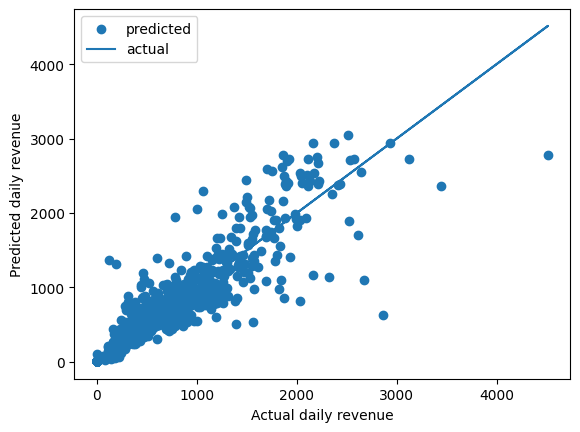

ModelMetricsRegression: stackedensemble
** Reported on test data. **

MSE: 60648.54307951288
RMSE: 246.26924915529523
MAE: 134.598155671539
RMSLE: 1.251502537378129
Mean Residual Deviance: 60648.54307951288


In [89]:


# convert pandas dataframe to h2o frame
test_h2o = h2o.H2OFrame(df)

# get predictions on the original dataset
preds = aml.leader.predict(test_h2o)

# convert predictions to pandas dataframe and add back the date column
preds_df = preds.as_data_frame()


# evaluate performance using RMSE
perf = aml.leader.model_performance(test_h2o)

# plot actual vs predicted values

plt.scatter(df['daily_revenue'], preds_df['predict'], label='predicted')
plt.plot(df['daily_revenue'], df['daily_revenue'], label='actual')
plt.xlabel('Actual daily revenue')
plt.ylabel('Predicted daily revenue')
plt.legend()
plt.show()
print(perf)



In [96]:
# initialize H2O
h2o.init()
from h2o.utils.kfold import kfold_column

# create a new column with 5-fold assignments
df['fold_id'] = kfold_column(df, nfolds=5, seed=1)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 24 mins
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_germa_esqa6t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.843 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


ModuleNotFoundError: No module named 'h2o.utils.kfold'

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a RandomForestRegressor object
rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)




InvalidParameterError: The 'type' parameter of Interval.__init__ must be an instance of 'type'. Got 'real_not_int' instead.

In [9]:
h2o.__version__


'3.40.0.1'

In [104]:
df.dtypes

day_of_month       int64
daily_revenue    float64
month              int64
year               int64
weekday            int64
closed             int64
holidays           int64
feelslike        float64
precip           float64
windgust         float64
windspeed        float64
cloudcover       float64
moonphase        float64
dtype: object

In [105]:
la_lluna_scaled2 = pd.read_csv("la_lluna_scaled2.csv")

In [106]:
la_lluna_scaled2.dtypes

day_of_month     float64
daily_revenue    float64
month            float64
year             float64
weekday          float64
closed           float64
holidays         float64
feelslike        float64
precip           float64
windgust         float64
windspeed        float64
cloudcover       float64
moonphase        float64
date_numeric     float64
dtype: object

In [116]:

# Define train-validation-test split ratio
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split the data into train, validation, and test sets
train_idx = int(train_ratio * len(train_data_norm))
val_idx = int((train_ratio + val_ratio) * len(train_data_norm))
X_train, y_train = create_sequences(train_data_norm.iloc[:train_idx], seq_length, target_col)
X_val, y_val = create_sequences(train_data_norm.iloc[train_idx:val_idx], seq_length, target_col)
X_test, y_test = create_sequences(test_data_norm, seq_length, target_col)

# Define the model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2, validation_data=(X_val, y_val))

# Define batch size
batch_size = 32

# Train the model for additional epochs with validation
num_epochs = 50
for epoch in range(num_epochs):
    # Train the model for one epoch
    model.fit(X_train, y_train, batch_size=batch_size, epochs=1, verbose=2, validation_data=(X_val, y_val))
    
    # Evaluate the model on the validation set
    val_loss = model.evaluate(X_val, y_val)
    print('Validation loss:', val_loss)


    
# Evaluate the model on the test set
np.seterr(divide='ignore', invalid='ignore') # to ignore warnings about division by zero
test_loss = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Rescale the predictions to the original scale
y_pred_rescaled = (y_pred * df.std()['daily_revenue']) + df.mean()['daily_revenue']
y_test_rescaled = (y_test * df.std()['daily_revenue']) + df.mean()['daily_revenue']




Epoch 1/50
21/21 - 4s - loss: 0.5787 - val_loss: 0.4957 - 4s/epoch - 195ms/step
Epoch 2/50
21/21 - 1s - loss: 0.4856 - val_loss: 0.4934 - 1s/epoch - 63ms/step
Epoch 3/50
21/21 - 1s - loss: 0.4626 - val_loss: 0.4977 - 1s/epoch - 63ms/step
Epoch 4/50
21/21 - 1s - loss: 0.4577 - val_loss: 0.4980 - 1s/epoch - 63ms/step
Epoch 5/50
21/21 - 1s - loss: 0.4394 - val_loss: 0.4938 - 1s/epoch - 64ms/step
Epoch 6/50
21/21 - 1s - loss: 0.4340 - val_loss: 0.4954 - 1s/epoch - 63ms/step
Epoch 7/50
21/21 - 1s - loss: 0.4149 - val_loss: 0.4890 - 1s/epoch - 63ms/step
Epoch 8/50
21/21 - 1s - loss: 0.4055 - val_loss: 0.4893 - 1s/epoch - 63ms/step
Epoch 9/50
21/21 - 1s - loss: 0.3963 - val_loss: 0.4905 - 1s/epoch - 64ms/step
Epoch 10/50
21/21 - 1s - loss: 0.3826 - val_loss: 0.4884 - 1s/epoch - 65ms/step
Epoch 11/50
21/21 - 1s - loss: 0.3734 - val_loss: 0.4869 - 1s/epoch - 63ms/step
Epoch 12/50
21/21 - 1s - loss: 0.3687 - val_loss: 0.4874 - 1s/epoch - 64ms/step
Epoch 13/50
21/21 - 1s - loss: 0.3632 - val_loss

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [ ]:
import pickle

# Save the model
with open('lstm_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the predictions
with open('lstm_predictions.pkl', 'wb') as f:
    pickle.dump(predictions, f)


In [ ]:
# Get the predicted revenue values in the original scale
predicted_revenue = scaler.inverse_transform(predicted_revenue)

# Create a new dataframe with the predicted revenue values and the corresponding dates
predicted_df = pd.DataFrame({'date': test_dates, 'predicted_revenue': predicted_revenue[:, 0]})

# Merge the predicted dataframe with the actual dataframe on the 'date' column
merged_df = actual_df.merge(predicted_df, on='date', how='outer')

# Plot the actual and predicted revenue values over time
merged_df.plot(x='date', y=['daily_revenue', 'predicted_revenue'], figsize=(12, 6))


In [118]:
df=pd.read_csv("la_lluna_scaled2.csv")

In [120]:
df.dtypes

day_of_month     float64
daily_revenue    float64
month            float64
year             float64
weekday          float64
closed           float64
holidays         float64
feelslike        float64
precip           float64
windgust         float64
windspeed        float64
cloudcover       float64
moonphase        float64
date_numeric     float64
dtype: object

In [ ]:
# H2O requires the data to be in a "H2OFrame" object, which can be created by calling h2o.import_file().
#We split the data into training and validation sets using the split_frame() method.
#The H2OAutoML object is instantiated with a maximum runtime of 1 hour (max_runtime_secs=3600).
#The AutoML process will try many different algorithms and hyperparameters to find the best model for the given data.
#The leaderboard shows the performance of the models, ranked by their cross-validation performance.
#The predict() method can be used on the leader model to make predictions on a new dataset.
#The export_file() method can be used to save the predictions to a file.

In [121]:
import h2o
from h2o.automl import H2OAutoML

# initialize h2o
h2o.init()

# load data
data = h2o.import_file("la_lluna_scaled2.csv")

# set target column and predictor columns
y = "daily_revenue"
X = data.col_names
X.remove(y)

# run autoML
aml = H2OAutoML(max_runtime_secs=600, seed=1)
aml.train(x=X, y=y, training_frame=data)

# view the leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows)) 


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 day 2 hours 37 mins
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,1 month and 4 days
H2O_cluster_name:,H2O_from_python_germa_esqa6t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.843 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
23:50:31.283: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     rmse       mse       mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_6_AutoML_2_20230312_235031     0.570514  0.325486  0.356545      nan                  0.325486
StackedEnsemble_BestOfFamily_6_AutoML_2_20230312_235031  0.570557  0.325535  0.360387      nan                  0.325535
GBM_grid_1_AutoML_2_20230312_235031_model_50             0.571605  0.326732  0.357227      nan                  0.326732
StackedEnsemble_BestOfFamily_4_AutoML_2_20230312_235031  0.572762  0.328057  0.362346      nan                  0.328057
GBM_grid_1_AutoML_2_20230312_235031_model_51             0.57352   0.328925  0.356854      nan                  0.328925
StackedEnsemble_BestO

In [123]:
# Get the best performing model
# view the leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows)) 


model_id                                                     rmse       mse       mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_6_AutoML_2_20230312_235031     0.570514  0.325486  0.356545      nan                  0.325486
StackedEnsemble_BestOfFamily_6_AutoML_2_20230312_235031  0.570557  0.325535  0.360387      nan                  0.325535
GBM_grid_1_AutoML_2_20230312_235031_model_50             0.571605  0.326732  0.357227      nan                  0.326732
StackedEnsemble_BestOfFamily_4_AutoML_2_20230312_235031  0.572762  0.328057  0.362346      nan                  0.328057
GBM_grid_1_AutoML_2_20230312_235031_model_51             0.57352   0.328925  0.356854      nan                  0.328925
StackedEnsemble_BestOfFamily_2_AutoML_2_20230312_235031  0.576259  0.332075  0.369834      nan                  0.332075
StackedEnsemble_AllModels_1_AutoML_2_20230312_235031     0.577102  0.333046  0.370428      nan                  0.333046
StackedEnsemble_AllModels_2_Auto

In [124]:
# get the best performing model
best_model = aml.leader

# evaluate the model performance on the training data
perf = best_model.model_performance(data)

# print the R-squared value
print("R-squared on training data: ", perf.r2())



R-squared on training data:  0.9440400940706369


In [125]:
model_path = h2o.save_model(model=aml.leader, path="./best_model", force=True)


In [127]:
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))


model_id                                                     rmse       mse       mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_6_AutoML_2_20230312_235031     0.570514  0.325486  0.356545      nan                  0.325486
StackedEnsemble_BestOfFamily_6_AutoML_2_20230312_235031  0.570557  0.325535  0.360387      nan                  0.325535
GBM_grid_1_AutoML_2_20230312_235031_model_50             0.571605  0.326732  0.357227      nan                  0.326732
StackedEnsemble_BestOfFamily_4_AutoML_2_20230312_235031  0.572762  0.328057  0.362346      nan                  0.328057
GBM_grid_1_AutoML_2_20230312_235031_model_51             0.57352   0.328925  0.356854      nan                  0.328925
StackedEnsemble_BestOfFamily_2_AutoML_2_20230312_235031  0.576259  0.332075  0.369834      nan                  0.332075
StackedEnsemble_AllModels_1_AutoML_2_20230312_235031     0.577102  0.333046  0.370428      nan                  0.333046
StackedEnsemble_AllModels_2_Auto

In [2]:


# initialize h2o
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 19.0.2+7-44, mixed mode, sharing)
  Starting server from C:\Users\germa\miniconda3\envs\ironhack\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\germa\AppData\Local\Temp\tmp6tz7e4i0
  JVM stdout: C:\Users\germa\AppData\Local\Temp\tmp6tz7e4i0\h2o_germa_started_from_python.out
  JVM stderr: C:\Users\germa\AppData\Local\Temp\tmp6tz7e4i0\h2o_germa_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_germa_eb1tva
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.912 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
h2o.__version__

'3.40.0.2'

In [17]:
# load data
data = h2o.import_file("la_lluna_scaled2.csv")

# split the dataset into train and test data
train, test = data.split_frame(ratios=[0.95], seed=1)

# set target column and predictor columns
y = "daily_revenue"
X = data.col_names
X.remove(y)

# set nfolds and max_runtime_secs parameters
nfolds = 5
max_runtime_secs = 2000
early_stopping_rounds = 11

# run autoML
aml = H2OAutoML(keep_cross_validation_predictions = True, max_runtime_secs=max_runtime_secs, seed=1, nfolds=nfolds, 
                stopping_rounds=early_stopping_rounds, stopping_metric='RMSE')
aml.train(x=X, y=y, training_frame=train)

# view the leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
12:31:05.933: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                              rmse       mse       mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_6_AutoML_2_20230313_123105              0.570905  0.325932  0.363564      nan                  0.325932
StackedEnsemble_BestOfFamily_6_AutoML_2_20230313_123105           0.572089  0.327286  0.368682      nan                  0.327286
GBM_lr_annealing_selection_AutoML_2_20230313_123105_select_model  0.572655  0.327934  0.365528      nan                  0.327934
StackedEnsemble_BestOfFamily_4_AutoML_2_20230313_123105           0.57525   0.330913  0.373407      nan                  0.330913
StackedEnsemble_AllModels_2_AutoML_2_20230313_123105              0.576921  0.332838  0.371263   

In [18]:
predictions = aml.leader.predict(test)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [42]:
aml

In [27]:
predictions

predict
0.0702544
1.77392
-1.11655
-0.00981495
-0.321082
-1.10179
-0.103795
-0.444736
-1.09613
-1.02263


In [19]:
perf = aml.leader.model_performance(test)


In [28]:
perf

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.046964959475318264
RMSE: 0.21671400387450337
MAE: 0.1395528755505027
RMSLE: NaN
Mean Residual Deviance: 0.046964959475318264
R^2: 0.9530350406566853
Null degrees of freedom: 1080
Residual degrees of freedom: 1064
Null deviance: 1081.0605783923454
Residual deviance: 50.76912119281904
AIC: -202.33502298823691

In [20]:
# save the leader model
model_path = h2o.save_model(model=aml.leader, path="./best_model4", force=True)


In [21]:
# get the best performing model
best_model = aml.leader

# evaluate the model performance on the training data
perf = best_model.model_performance(data)

# print the R-squared value
print("R-squared on training data: ", perf.r2())


R-squared on training data:  0.9530350406566853


In [22]:
latest_model = h2o.load_model('StackedEnsemble_AllModels_6_AutoML_2_20230313_123105')
latest_model.summary()


key,value
Stacking strategy,cross_validation
Number of base models (used / total),16/135
# GBM base models (used / total),12/102
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),4/30
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [23]:
latest_model.model_performance()

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.03789042814744726
RMSE: 0.19465463813494724
MAE: 0.1317881527202073
RMSLE: NaN
Mean Residual Deviance: 0.03789042814744726
R^2: 0.9621702910293519
Null degrees of freedom: 1036
Residual degrees of freedom: 1020
Null deviance: 1038.6644533636131
Residual deviance: 39.29237398890281
AIC: -415.2813363089964

In [16]:
latest_model.model_performance(test_data=test)

NameError: name 'test' is not defined

In [ ]:
# ALTERNATIVE FOR OVERFITTING

# load data
data = h2o.import_file("la_lluna_scaled2.csv")

# split the dataset into train and test data
train, test = data.split_frame(ratios=[0.85], seed=1)

# set target column and predictor columns
y = "daily_revenue"
X = data.col_names
X.remove(y)

# set nfolds and max_runtime_secs parameters
nfolds = 5
max_runtime_secs = 1800
early_stopping_rounds = 11

# define hyperparameters to tune
hyper_params = {'max_depth': [3, 5, 7, 9, 11],
                'ntrees': [50, 100, 150, 200, 250],
                'learn_rate': [0.01, 0.05, 0.1, 0.2, 0.3]}

# run hyperparameter tuning with random search
search_criteria = {'strategy': "RandomDiscrete", 
                   'max_models': 30, 
                   'seed': 1}
grid = H2OGridSearch(model=H2OGradientBoostingEstimator(nfolds=nfolds, stopping_rounds=early_stopping_rounds, stopping_metric='RMSE', 
                                                         max_runtime_secs=max_runtime_secs),
                     hyper_params=hyper_params,
                     grid_id='gbm_grid',
                     search_criteria=search_criteria)
grid.train(x=X, y=y, training_frame=train)

# select the best model from the grid search
best_model = grid.get_grid()[0]

# train the selected model on the full training dataset
best_model.train(x=X, y=y, training_frame=data)

# view the leaderboard for the grid search models
gridperf = grid.get_grid(sort_by='RMSE', decreasing=False)
print(gridperf)

# view the model performance on the test dataset
test_perf = best_model.model_performance(test_data=test)
print(test_perf)


In [ ]:
#ALTERNATIVE 2 FOR PREVENTING OVERFITTING

# load data
data = h2o.import_file("la_lluna_scaled2.csv")

# set target column and predictor columns
y = "daily_revenue"
X = data.col_names
X.remove(y)

# set nfolds and max_runtime_secs parameters
nfolds = 5
max_runtime_secs = 2000
early_stopping_rounds = 11

# split the dataset into train and test data
train, test = data.split_frame(ratios=[0.8], seed=1)

# define hyperparameters for H2O AutoML
aml.leader.params['metalearner_params'] = {
    'lambda': 0.1}
aml.leader.params['max_models'] = 50
aml.leader.params['gbm_params'] = {
    'learn_rate': 0.01}
aml.leader.params['dl_params'] = {
    'learn_rate': 0.01}

aml = H2OAutoML(
  keep_cross_validation_predictions=True,
  max_models=None,
  seed=1,
  nfolds=nfolds,
  max_runtime_secs=max_runtime_secs,
  stopping_rounds=early_stopping_rounds,
  stopping_metric='RMSE'
)

# run H2O AutoML
aml.train(x=X, y=y, training_frame=train)

# view the leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

# get the performance of the best model on the test data
perf = aml.leader.model_performance(test)
print(perf)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


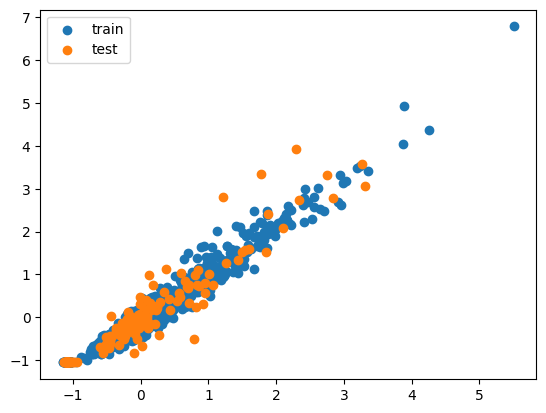

In [36]:
# Plot the residuals: You can plot the residuals of the model predictions 
# versus the actual values for both the training and test data. 
# This can help you see if there are any patterns or trends in the errors.

train_pred = aml.leader.predict(train)
test_pred = aml.leader.predict(test)

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(train_pred.as_data_frame(), train[y].as_data_frame(), label="train")
plt.scatter(test_pred.as_data_frame(), test[y].as_data_frame(), label="test")
plt.legend()
plt.show()


In [39]:
if aml.leader is not None:
    var_imp = aml.leader.varimp(use_pandas=True)
    var_imp.plot(kind='bar', x='variable', y='scaled_importance')
else:
    print("AutoML leaderboard is empty. Please run the AutoML process first.")


AttributeError: 'NoneType' object has no attribute 'plot'

In [45]:
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),16/135
# GBM base models (used / total),12/102
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),4/30
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [44]:
# Plot the learning curves: You can plot the learning curves to see 
# how the model's performance improves as you increase the amount of training data.

train_sizes, train_scores, test_scores = learning_curve(
    estimator=aml.leader,
    X=X, y=y,
    train_sizes=train_sizes,
    scoring='neg_mean_squared_error',  # specify a scoring metric
    cv=5,  # specify the number of cross-validation folds
    n_jobs=-1  # use all available CPU cores
)



ValueError: train_sizes has been interpreted as absolute numbers of training samples and must be within (0, 10], but is within [100, 2000].

In [32]:
# get predictions on the test data
preds = latest_model.predict(test)

# get the actual values from the test data
actual = test[y]

# reverse scaling
scaling_factor = 100
preds_actual = preds.as_data_frame()['predict'] / scaling_factor
actual_actual = actual.as_data_frame()[y] / scaling_factor

# calculate the error
error = preds_actual - actual_actual


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [33]:
error

0     -0.000219
1     -0.003225
2     -0.015759
3      0.000616
4     -0.002015
         ...   
159    0.001094
160   -0.000479
161   -0.000155
162   -0.002601
163   -0.000215
Length: 164, dtype: float64

In [34]:
error.mean()

-1.634401478852457e-05

In [35]:
error.std()

0.0033132758684654515

In [49]:
test

day_of_month,daily_revenue,month,year,weekday,closed,holidays,feelslike,precip,windgust,windspeed,cloudcover,moonphase,date_numeric
-0.646167,1.27313,-1.45626,-1.35025,0.499711,-0.539923,-0.190875,-1.12431,4.05754,-0.0423515,-0.14394,0.0437817,0.0609148,-1.8966
0.596526,0.392749,-1.45626,-1.35025,-1.00081,-0.539923,-0.190875,-1.22388,16.7104,3.73148,6.85514,1.55114,1.38206,-1.86239
-0.759139,3.34985,-1.18376,-1.35025,1.50006,-0.539923,-0.190875,-0.811382,-0.217086,0.0329994,0.075639,-0.743802,0.0609148,-1.8033
0.596526,0.761386,-1.18376,-1.35025,0.499711,-0.539923,-0.190875,-0.697589,-0.217086,-0.0423515,-0.0753216,-1.27581,1.52113,-1.76597
1.04841,0.854084,-1.18376,-1.35025,-1.00081,-0.539923,-0.190875,-0.59802,-0.217086,-0.117702,0.555968,-0.149202,-1.46884,-1.75353
-1.324,0.692228,-0.911265,-1.35025,-0.500636,-0.539923,-0.190875,-0.541123,-0.217086,-0.626321,-0.610545,0.549713,-0.530126,-1.72865
-1.21103,0.748235,-0.911265,-1.35025,-0.000462695,-0.539923,-0.190875,-0.242416,-0.217086,1.81003,1.40684,-0.248302,-0.425825,-1.72554
-0.30725,0.173565,-0.911265,-1.35025,0.499711,-0.539923,-0.190875,-0.213968,-0.217086,-2.1459,0.336389,-0.0813972,0.512887,-1.70066
-0.194278,-1.05607,-0.911265,-1.35025,0.999884,1.85211,-0.190875,-0.299312,-0.217086,-2.1459,-0.92619,0.857444,0.617188,-1.69755
1.27436,-1.05607,-0.911265,-1.35025,0.499711,1.85211,-0.190875,-1.08164,-0.215438,-0.80214,-1.28301,0.0594291,-1.32977,-1.65712


In [53]:
test_df = test.as_data_frame()


In [54]:
y_test = test_df["daily_revenue"]


In [55]:
predictions_df = predictions.as_data_frame()


In [56]:
y_pred = predictions_df["predict"]


In [57]:
abs_diff = abs(y_test - y_pred)


In [74]:

la_lluna["date"] = pd.to_datetime(la_lluna["date"], format='%Y-%m-%d')


In [75]:
la_lluna.dtypes

day_of_month              int64
daily_revenue           float64
month                     int64
year                      int64
date             datetime64[ns]
weekday_str              object
weekday                   int64
closed                    int64
holidays                  int64
feelslike               float64
precip                  float64
windgust                float64
windspeed               float64
cloudcover              float64
moonphase               float64
date_numeric              int64
dtype: object

In [76]:
la_lluna.head()

,day_of_month,daily_revenue,month,year,date,weekday_str,weekday,closed,holidays,feelslike,precip,windgust,windspeed,cloudcover,moonphase,date_numeric
0,1,1153.09,1,2020,2020-01-01,Wednesday,3,0,1,7.3,0.0,14.6,16.3,27.2,0.20,1577836800000000000
1,2,0.00,1,2020,2020-01-02,Thursday,4,1,0,7.1,0.0,44.6,15.2,49.4,0.23,1577923200000000000
2,3,2205.11,1,2020,2020-01-03,Friday,5,0,0,8.2,0.0,48.2,22.8,53.3,0.25,1578009600000000000
3,4,2525.07,1,2020,2020-01-04,Saturday,6,0,0,7.2,0.0,40.7,16.6,12.7,0.30,1578096000000000000
4,5,2030.62,1,2020,2020-01-05,Sunday,7,0,0,7.9,0.0,46.4,16.7,3.1,0.33,1578182400000000000


In [71]:
# Load the data into a pandas dataframe
la_lluna = pd.read_csv("la_lluna.csv")

In [68]:
test

day_of_month,daily_revenue,month,year,weekday,closed,holidays,feelslike,precip,windgust,windspeed,cloudcover,moonphase,date_numeric
-0.646167,1.27313,-1.45626,-1.35025,0.499711,-0.539923,-0.190875,-1.12431,4.05754,-0.0423515,-0.14394,0.0437817,0.0609148,-1.8966
0.596526,0.392749,-1.45626,-1.35025,-1.00081,-0.539923,-0.190875,-1.22388,16.7104,3.73148,6.85514,1.55114,1.38206,-1.86239
-0.759139,3.34985,-1.18376,-1.35025,1.50006,-0.539923,-0.190875,-0.811382,-0.217086,0.0329994,0.075639,-0.743802,0.0609148,-1.8033
0.596526,0.761386,-1.18376,-1.35025,0.499711,-0.539923,-0.190875,-0.697589,-0.217086,-0.0423515,-0.0753216,-1.27581,1.52113,-1.76597
1.04841,0.854084,-1.18376,-1.35025,-1.00081,-0.539923,-0.190875,-0.59802,-0.217086,-0.117702,0.555968,-0.149202,-1.46884,-1.75353
-1.324,0.692228,-0.911265,-1.35025,-0.500636,-0.539923,-0.190875,-0.541123,-0.217086,-0.626321,-0.610545,0.549713,-0.530126,-1.72865
-1.21103,0.748235,-0.911265,-1.35025,-0.000462695,-0.539923,-0.190875,-0.242416,-0.217086,1.81003,1.40684,-0.248302,-0.425825,-1.72554
-0.30725,0.173565,-0.911265,-1.35025,0.499711,-0.539923,-0.190875,-0.213968,-0.217086,-2.1459,0.336389,-0.0813972,0.512887,-1.70066
-0.194278,-1.05607,-0.911265,-1.35025,0.999884,1.85211,-0.190875,-0.299312,-0.217086,-2.1459,-0.92619,0.857444,0.617188,-1.69755
1.27436,-1.05607,-0.911265,-1.35025,0.499711,1.85211,-0.190875,-1.08164,-0.215438,-0.80214,-1.28301,0.0594291,-1.32977,-1.65712


In [67]:
predictions

predict
0.0702544
1.77392
-1.11655
-0.00981495
-0.321082
-1.10179
-0.103795
-0.444736
-1.09613
-1.02263


In [70]:
la_lluna_scaled.dtypes

day_of_month     float64
daily_revenue    float64
month            float64
year             float64
weekday          float64
closed           float64
holidays         float64
feelslike        float64
precip           float64
windgust         float64
windspeed        float64
cloudcover       float64
moonphase        float64
date_numeric     float64
dtype: object

In [69]:
# Initialize the standard scaler
scaler = StandardScaler()

# Load the data into a pandas dataframe
la_lluna = pd.read_csv("la_lluna.csv")

# Drop the date column, which is not relevant to the model
la_lluna = la_lluna.drop(columns=['date', 'weekday_str'])

# Standardize the relevant features
la_lluna_scaled = scaler.fit_transform(la_lluna)

# Convert the scaled features array back into a dataframe
la_lluna_scaled = pd.DataFrame(la_lluna_scaled, columns=la_lluna.columns)

# Load the predictions into a pandas dataframe
predictions_df = predictions.as_data_frame()

# Reverse the scaling on the predictions
y_pred_scaled = scaler.inverse_transform(predictions_df[['predict']])
y_pred_scaled = pd.Series(y_pred_scaled[:,0])

# Load the test data into a pandas dataframe
test_df = test.as_data_frame()

# Extract the daily_revenue column from the test data
y_test = test_df['daily_revenue']

# Reverse the scaling on the daily_revenue column of the test data
y_test_scaled = scaler.inverse_transform(test_df[['daily_revenue']])
y_test_scaled = pd.Series(y_test_scaled[:,0])

# Calculate the absolute difference between the predicted and actual revenue
absolute_diff = abs(y_pred_scaled.values - y_test_scaled.values)

# Calculate the average absolute difference
average_diff = np.mean(absolute_diff)

# Print the results
print(f"Absolute difference: {absolute_diff}")
print(f"Average absolute difference: {average_diff}")





ValueError: non-broadcastable output operand with shape (44,1) doesn't match the broadcast shape (44,14)